In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
m = pd.read_csv("../../data/processed/processed_2.csv")

m

,영화명,감독,제작사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)어바웃잇영화사 해그림 주식회사(주)씨제이이엔엠,2019-01-23,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,리얼라이즈픽쳐스(주)(주)덱스터스튜디오,2017-12-20,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)제이케이필름(주)씨제이이엔엠,2014-12-17,장편,한국,966,1.108280e+11,14245998,2.584252e+10,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소조 루소,마블 스튜디오,2019-04-24,장편,미국,2835,1.221827e+11,13934592,3.357714e+10,3597963,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,늑대와 빨간 재킷,뱅상 파로노,NaN,2021-02-03,장편,프랑스,74,8.525200e+06,950,2.893740e+06,345,스릴러,청소년관람불가,독립/예술영화
3971,마라가 큰 결정을 해야 해,로버트 루케틱,NaN,2021-01-07,장편,미국,79,7.475940e+06,856,2.830800e+06,321,멜로/로맨스,15세이상관람가,일반영화
3972,락다운 213주,아담 메이슨,플래티넘 듄스,2022-08-31,장편,미국,61,7.664799e+06,845,3.573900e+06,381,스릴러,15세이상관람가,일반영화
3973,래미의 드래곤월드 구출작전,웨이밍 황,NaN,2020-07-16,장편,중국,65,6.067340e+06,779,6.345000e+05,74,애니메이션,전체관람가,일반영화


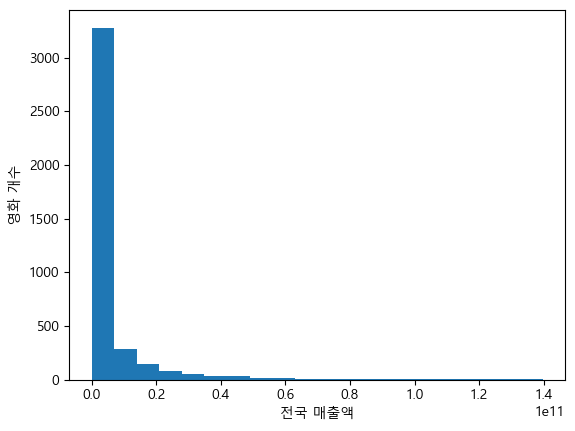

In [3]:
# 전국 매출액 히스토그램
plt.hist(m["전국 매출액"], bins=20)
plt.xlabel("전국 매출액")
plt.ylabel("영화 개수")
plt.show()

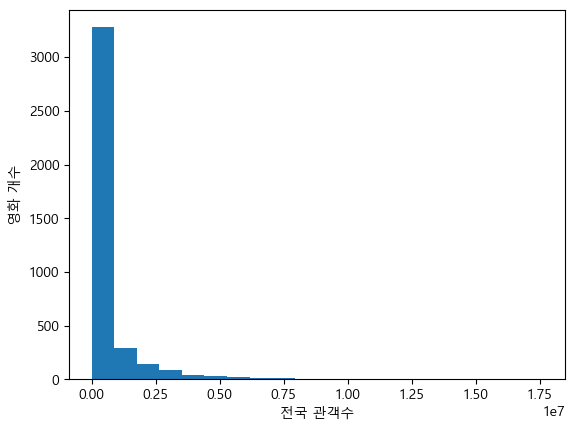

In [4]:
# 전국 관객수 히스토그램
plt.hist(m["전국 관객수"], bins=20)
plt.xlabel("전국 관객수")
plt.ylabel("영화 개수")
plt.show()

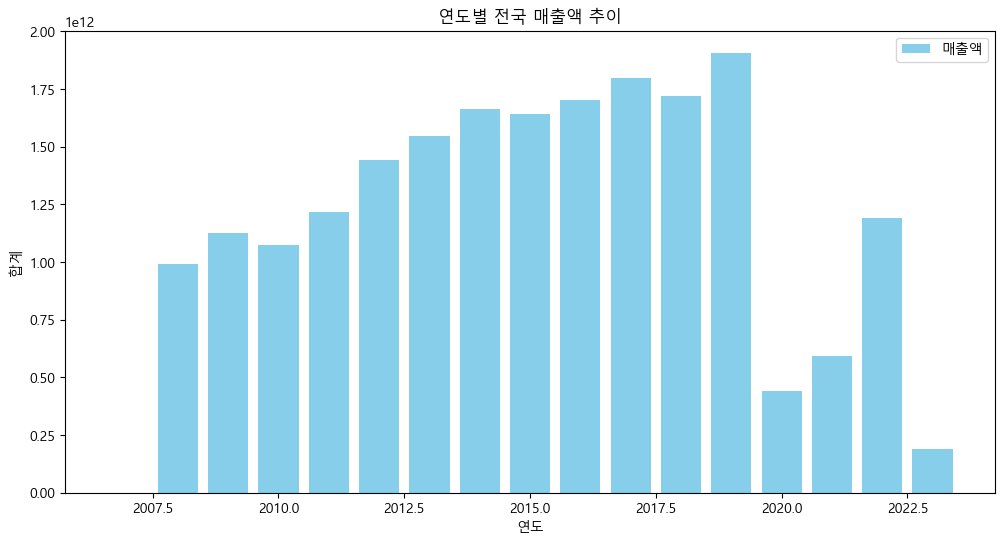

In [6]:
year_sum = m.groupby(pd.to_datetime(m['개봉일']).dt.year).sum()
plt.figure(figsize=(12,6))
plt.bar(year_sum.index, year_sum["전국 매출액"], color="skyblue", label="매출액")
plt.xlabel("연도")
plt.ylabel("합계")
plt.legend()
plt.title("연도별 전국 매출액 추이")
plt.show()

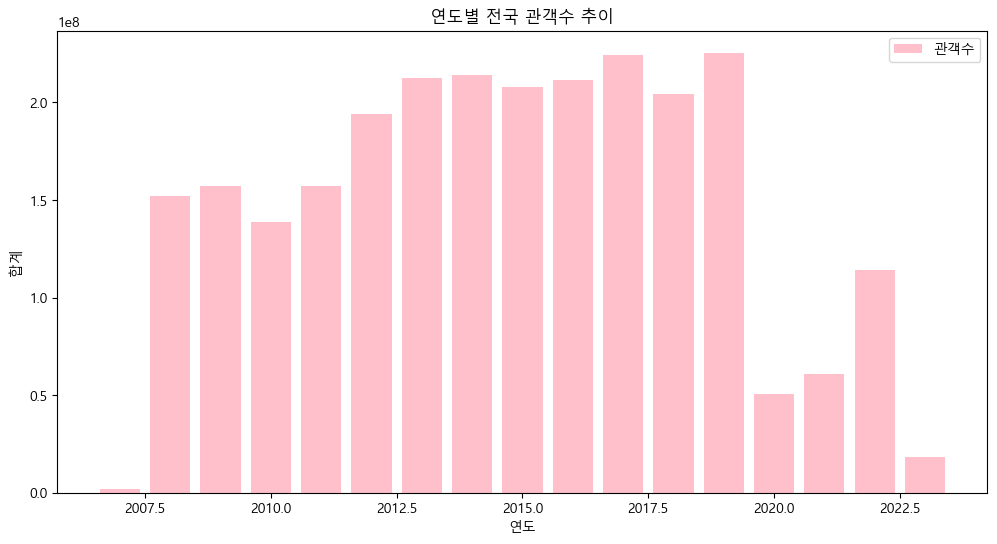

In [7]:
plt.figure(figsize=(12,6))
plt.bar(year_sum.index, year_sum["전국 관객수"], color="pink", label="관객수")
plt.xlabel("연도")
plt.ylabel("합계")
plt.legend()
plt.title("연도별 전국 관객수 추이")
plt.show()

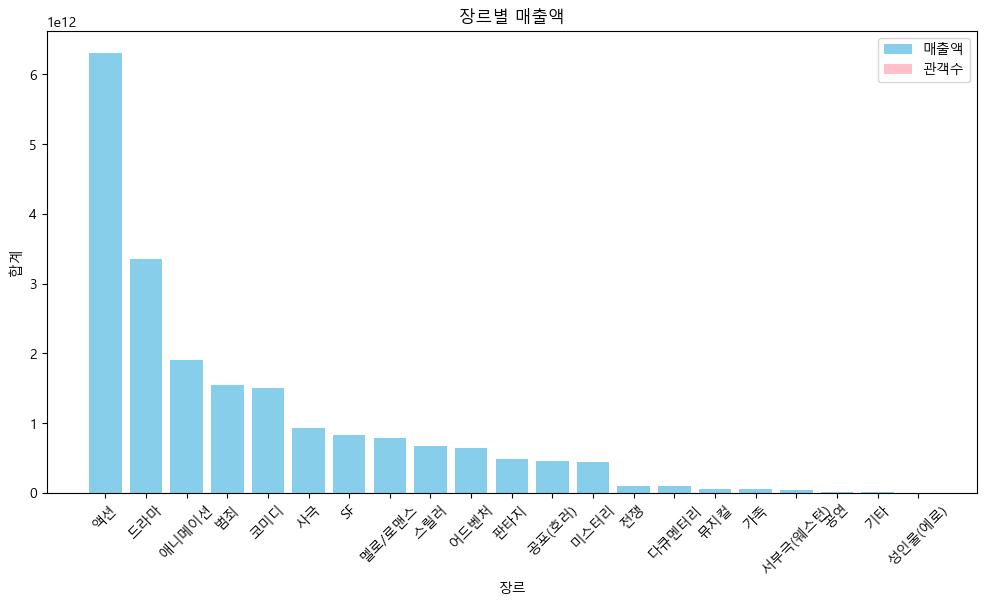

In [8]:
genre_sum = m.groupby('장르').sum().sort_values(by='전국 매출액', ascending=False)
plt.figure(figsize=(12,6))
plt.bar(genre_sum.index, genre_sum['전국 매출액'], color='skyblue', label='매출액')
plt.xlabel('장르')
plt.ylabel('합계')
plt.legend()
plt.title('장르별 매출액')
plt.xticks(rotation=45)
plt.show()

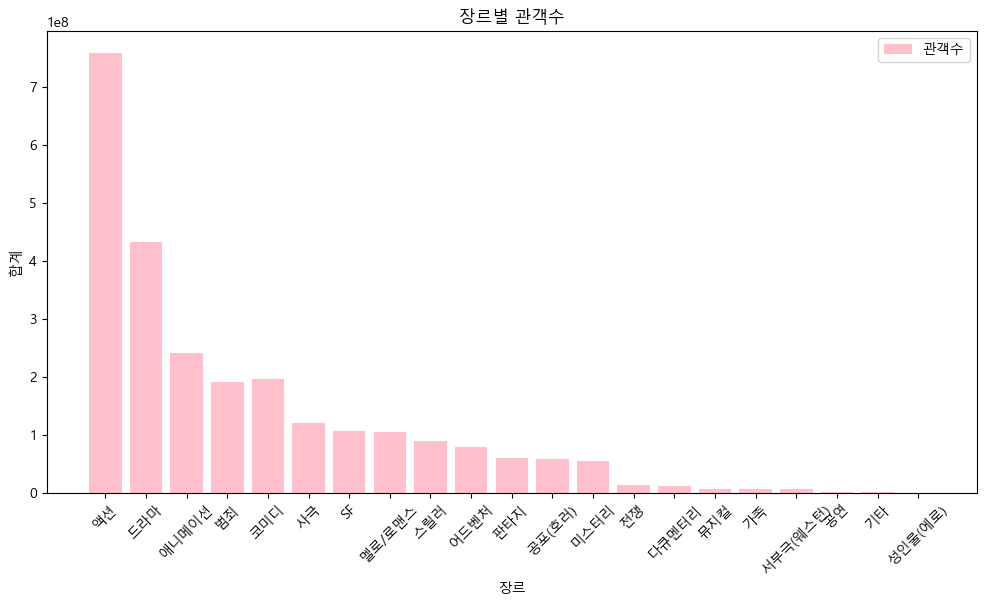

In [9]:
plt.figure(figsize=(12,6))
plt.bar(genre_sum.index, genre_sum['전국 관객수'], color='pink', label='관객수')
plt.xlabel('장르')
plt.ylabel('합계')
plt.legend()
plt.title('장르별 관객수')
plt.xticks(rotation=45)
plt.show()

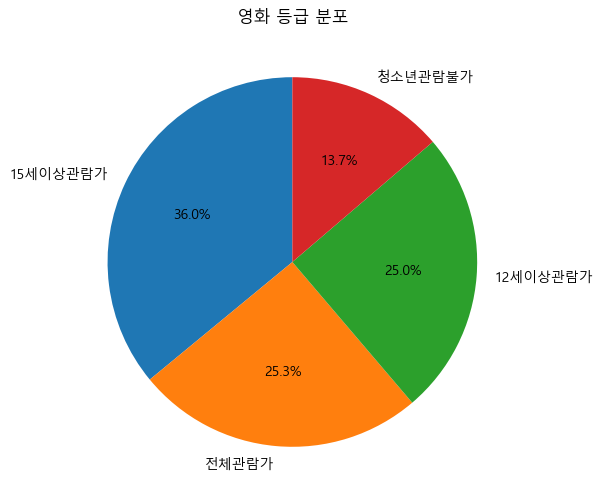

In [12]:
plt.figure(figsize=(6,6))
plt.pie(m["등급"].value_counts(), labels=m["등급"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("등급별 분포")
plt.show()

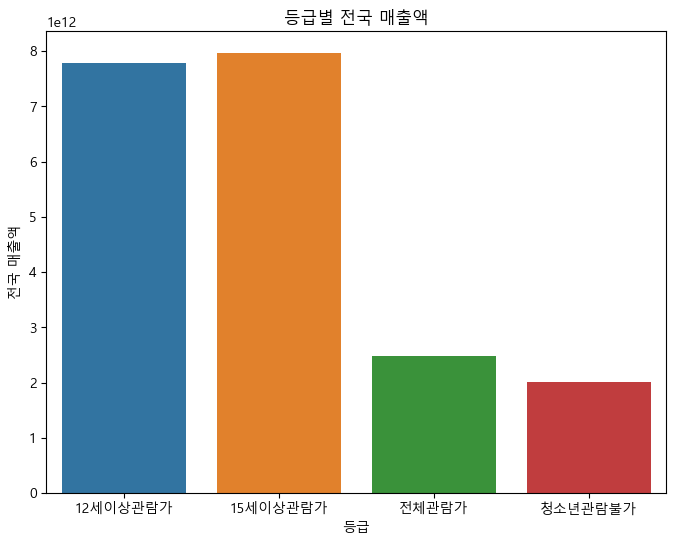

In [21]:
# 고윳값별 전국 매출액 계산
sales_by_rating = m.groupby("등급")["전국 매출액"].sum().reset_index()

# 시각화
plt.figure(figsize=(8,6))
sns.barplot(x="등급", y="전국 매출액", data=sales_by_rating)
plt.title("등급별 전국 매출액")
plt.show()

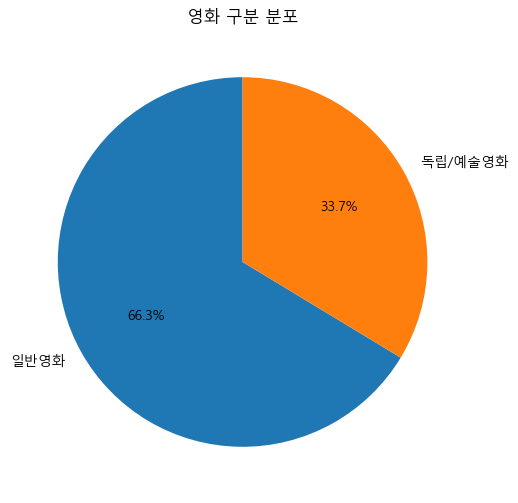

In [11]:
plt.figure(figsize=(6,6))
plt.pie(m["영화구분"].value_counts(), labels=m["영화구분"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("영화 구분 분포")
plt.show()

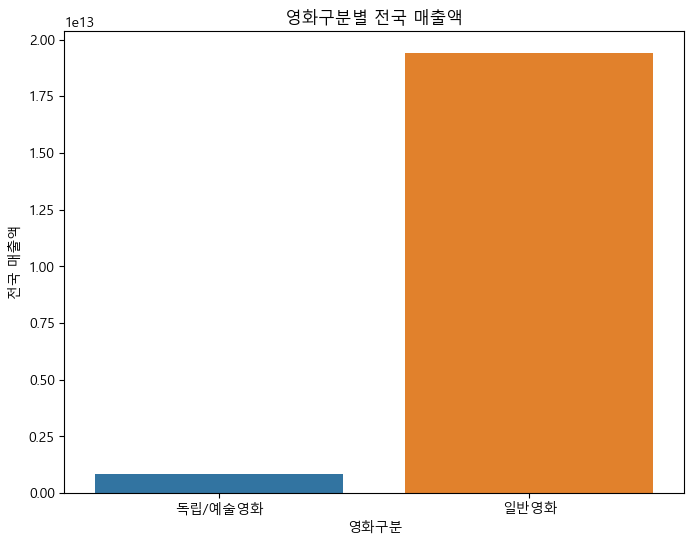

In [23]:
# 고윳값별 전국 매출액 계산
sales_by_rating = m.groupby("영화구분")["전국 매출액"].sum().reset_index()

# 시각화
plt.figure(figsize=(8,6))
sns.barplot(x="영화구분", y="전국 매출액", data=sales_by_rating)
plt.title("영화구분별 전국 매출액")
plt.show()